# Setup

## Imports

In [1]:
import QuantumToolbox as qt
using Logging
import CairoMakie as cm
using MiniLoggers
using Revise
using Dates

using ProgressLogging

import LsqFit

import JSON3
import CSV

using IJulia
if isdefined(Main, :IJulia)
    Main.IJulia.stdio_bytes[] = 0;
end

0

In [2]:
import SuperconductingCavities as SC

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


## Logger Setups

In [3]:
# MiniLogger(minlevel = MiniLoggers.Info) |> global_logger
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(ProgressLogger)

Base.CoreLogging.SimpleLogger(VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(21) open, 0 bytes waiting)), VSCodeServer.io_send_callback), Info, Dict{Any, Int64}())

# Loading Model

In [4]:
Model = SC.Circuits.Transmon_Resonators.load("ModelSaves/Mode3LargeTransmon/Mode3LargeTransmon.json");

In [5]:
Model.params["Model_Name"]

"Mode3LargeTransmon"

In [6]:
Model.params["Nt"]

30

# How many transmon levels in well? 

In [7]:
52/4

13.0

In [8]:
E_J = Model.hilbertspace.Components["Transmon"].Eʲ
E_C = Model.hilbertspace.Components["Transmon"].Eᶜ
ωp = sqrt(8*E_C*E_J)
println("E_J: $E_J")
println("Expected Number of Bound States: $(2*E_J/ωp)")
energies = real.(Model.hilbertspace.Components["Transmon"].eigsys_full.values);
println("Ground State Energy: $(energies[1])")

println("Number With Difference above groundstate less then Eʲ: $(length(findall(x->x<E_J, energies)))")

E_J: 26.96976142643705
Expected Number of Bound States: 11.451364241340668
Ground State Energy: -24.640602903844393
Number With Difference above groundstate less then Eʲ: 15


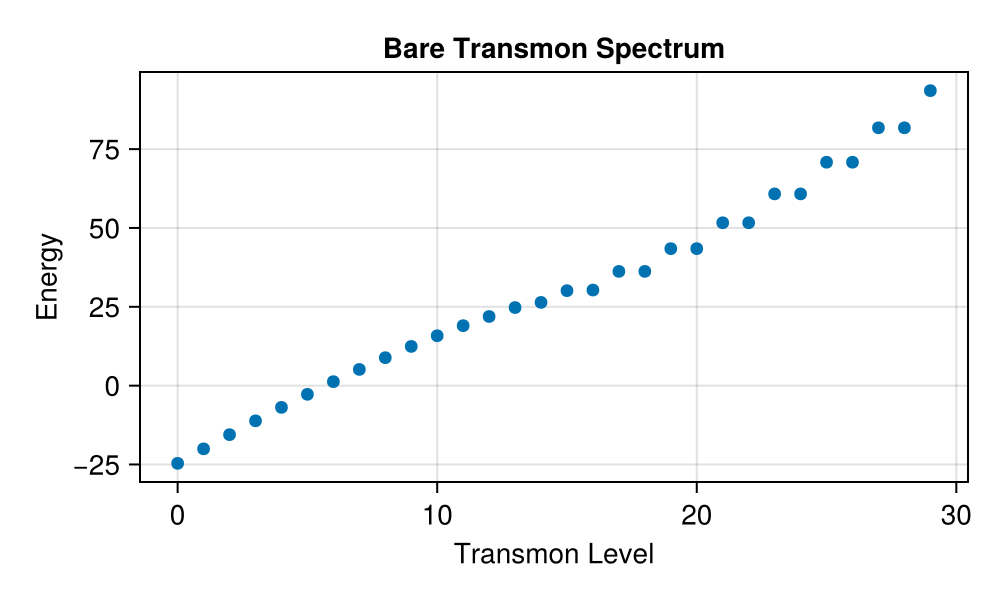

CairoMakie.Screen{IMAGE}


In [9]:
f = cm.Figure(size = (500, 300))
ax = cm.Axis(f[1,1], title = "Bare Transmon Spectrum", xlabel = "Transmon Level", ylabel = "Energy")

y = copy(energies)[1:30]
x = collect(0:(length(y)-1))
cm.scatter!(ax, x, y)

display(f)

# Plotting How Much the dressed states correspond to the bare state $|N\rangle\otimes|\empty\rangle$

In [10]:
overlap_probs = []
for i in 1:Model.params["Nt"]
    T_bare = qt.Qobj(Model.hilbertspace.Components["Transmon"].eigsys.vectors[:,i])
    R_bare = qt.Qobj(Model.hilbertspace.Components["Mode3"].eigsys.vectors[:, 1])
    ψ_bare = qt.tensor(T_bare, R_bare)

    state = (i-1, 0)
    ψ_dressed = Model.dressed_states[state]
    push!(overlap_probs, abs(ψ_dressed'*ψ_bare)^2)
end

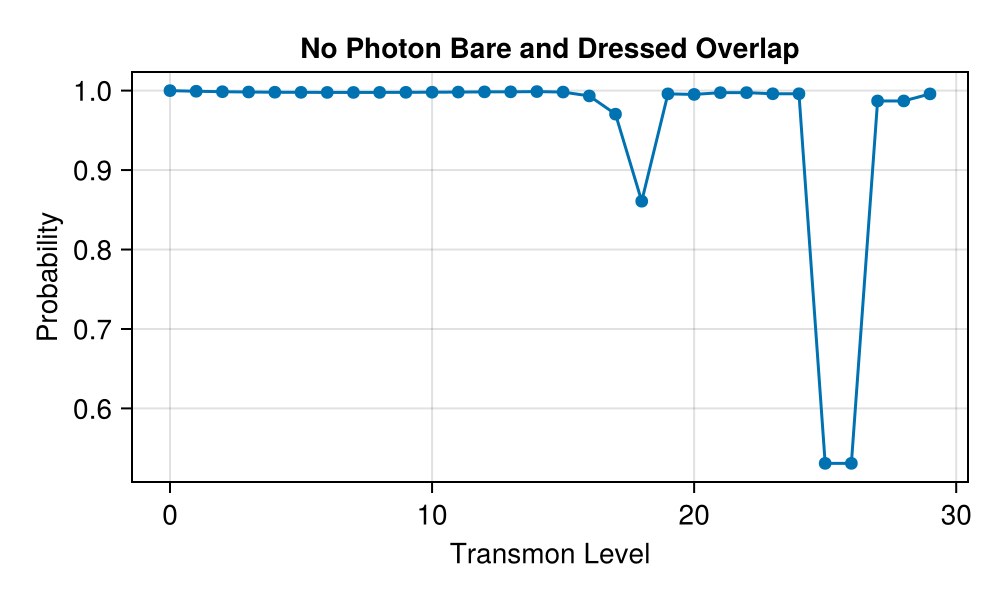

CairoMakie.Screen{IMAGE}


In [11]:
f  = cm.Figure(size = (500, 300))
ax = cm.Axis(f[1,1], title = "No Photon Bare and Dressed Overlap", xlabel = "Transmon Level", ylabel = "Probability")

y = overlap_probs
x = collect(0:(length(y)-1))
cm.scatterlines!(ax, x, y)

display(f)

# Floquet Sweep! 

[2024-11-17 14:58:50] Info: Doing Step 1/10


Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


[2024-11-17 15:00:06] Info: Fit Stuff: 3-element Vector{Float64}:	 7.234298886832387e-8	 3.612087811151555e-6	 2.000000206666565
[2024-11-17 15:00:06] Info: Doing Step 2/10


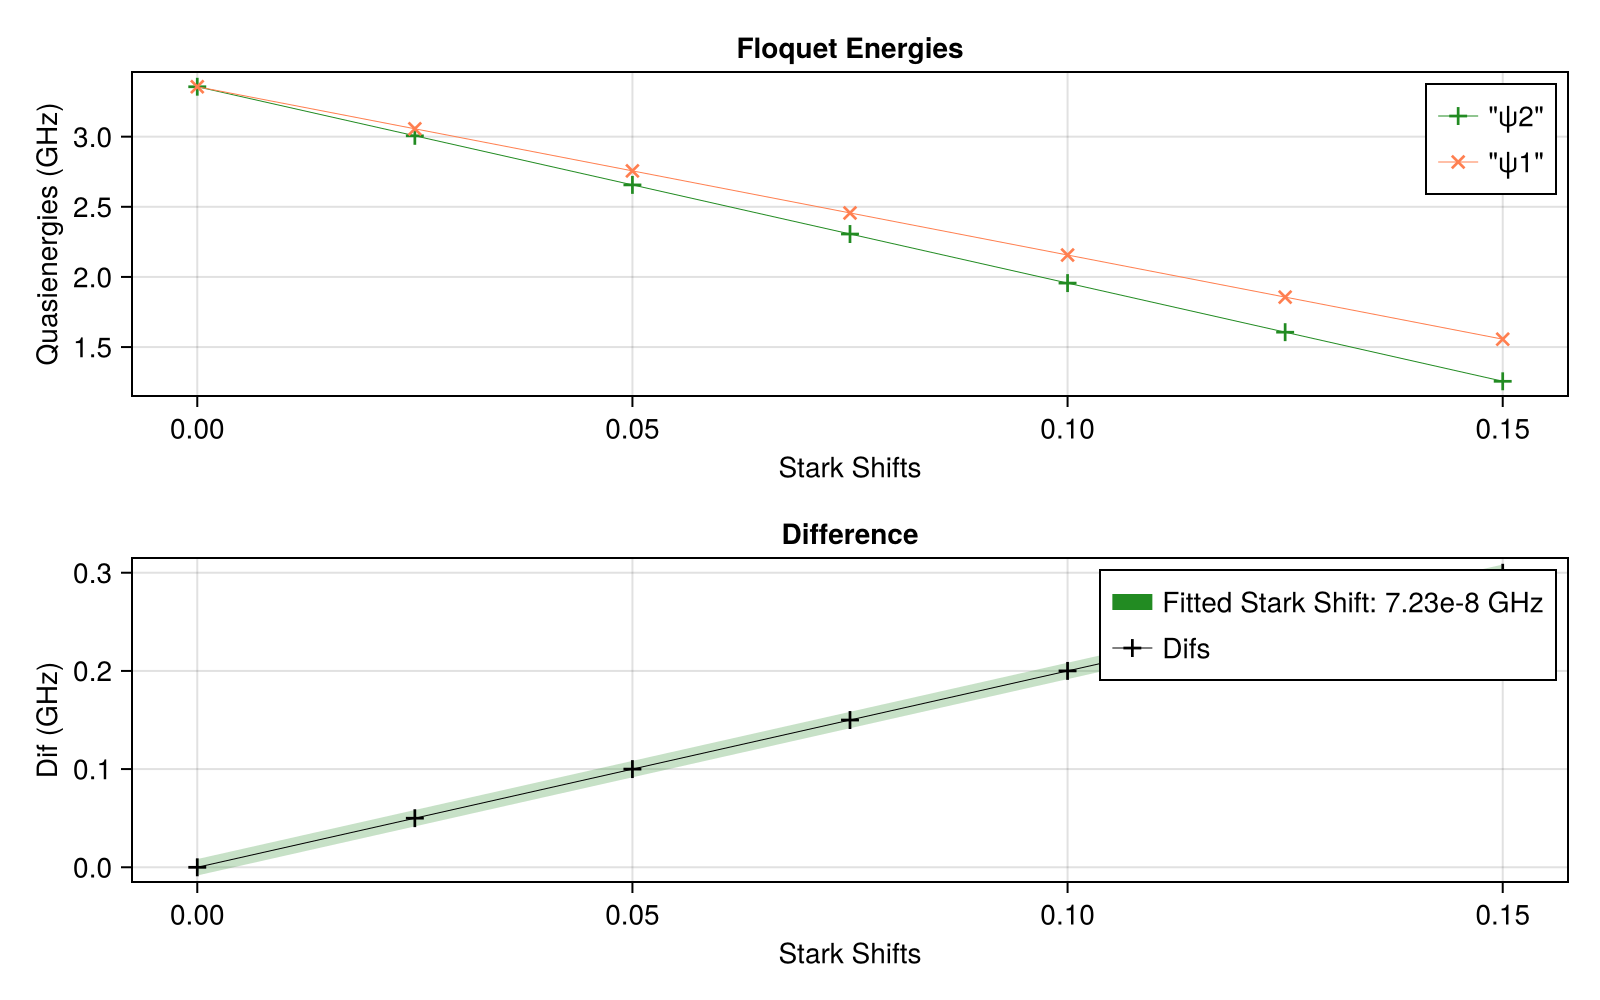

Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


[2024-11-17 15:01:34] Info: Fit Stuff: 3-element Vector{Float64}:	 0.0009055573984934073	 0.00042075825087228933	 2.00259824392104
[2024-11-17 15:01:34] Info: Doing Step 3/10


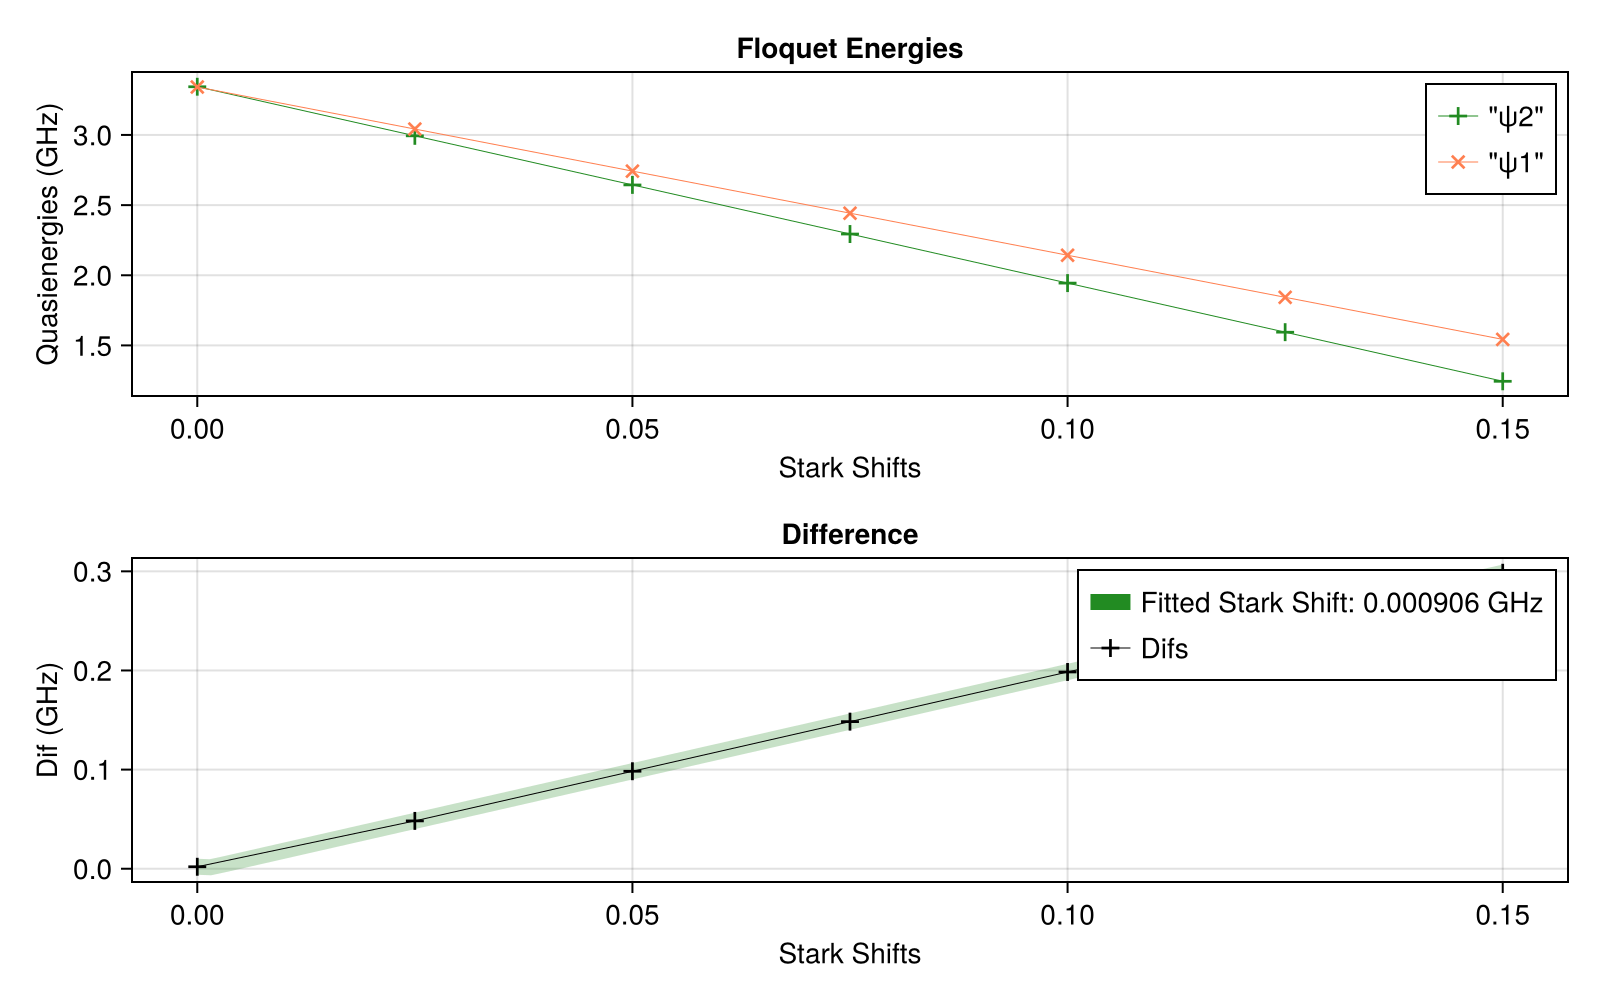

Progress: 100%|█████████████████████████████████████████| Time: 0:01:35


[2024-11-17 15:03:10] Info: Fit Stuff: 3-element Vector{Float64}:	 0.0035843324342989397	 0.0009065095260230024	 2.0103774364540903
[2024-11-17 15:03:10] Info: Doing Step 4/10


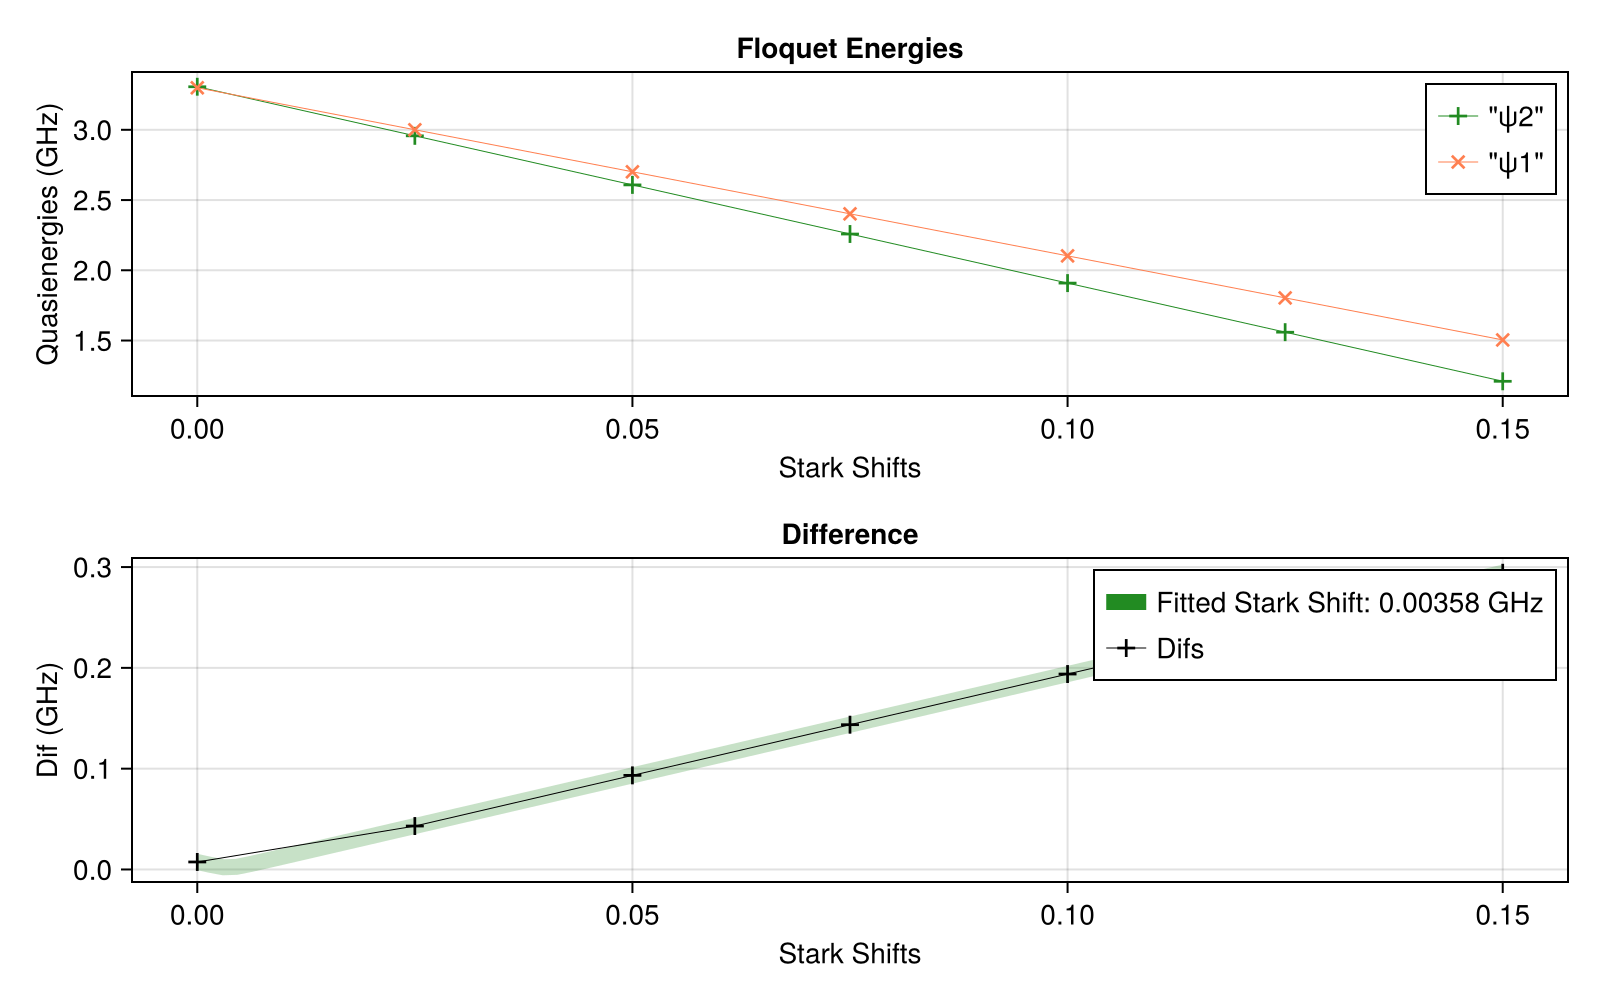

Progress: 100%|█████████████████████████████████████████| Time: 0:01:23


[2024-11-17 15:04:34] Info: Fit Stuff: 3-element Vector{Float64}:	 0.008017948696594215	 0.0014374176210561228	 2.0235674371391967
[2024-11-17 15:04:34] Info: Doing Step 5/10


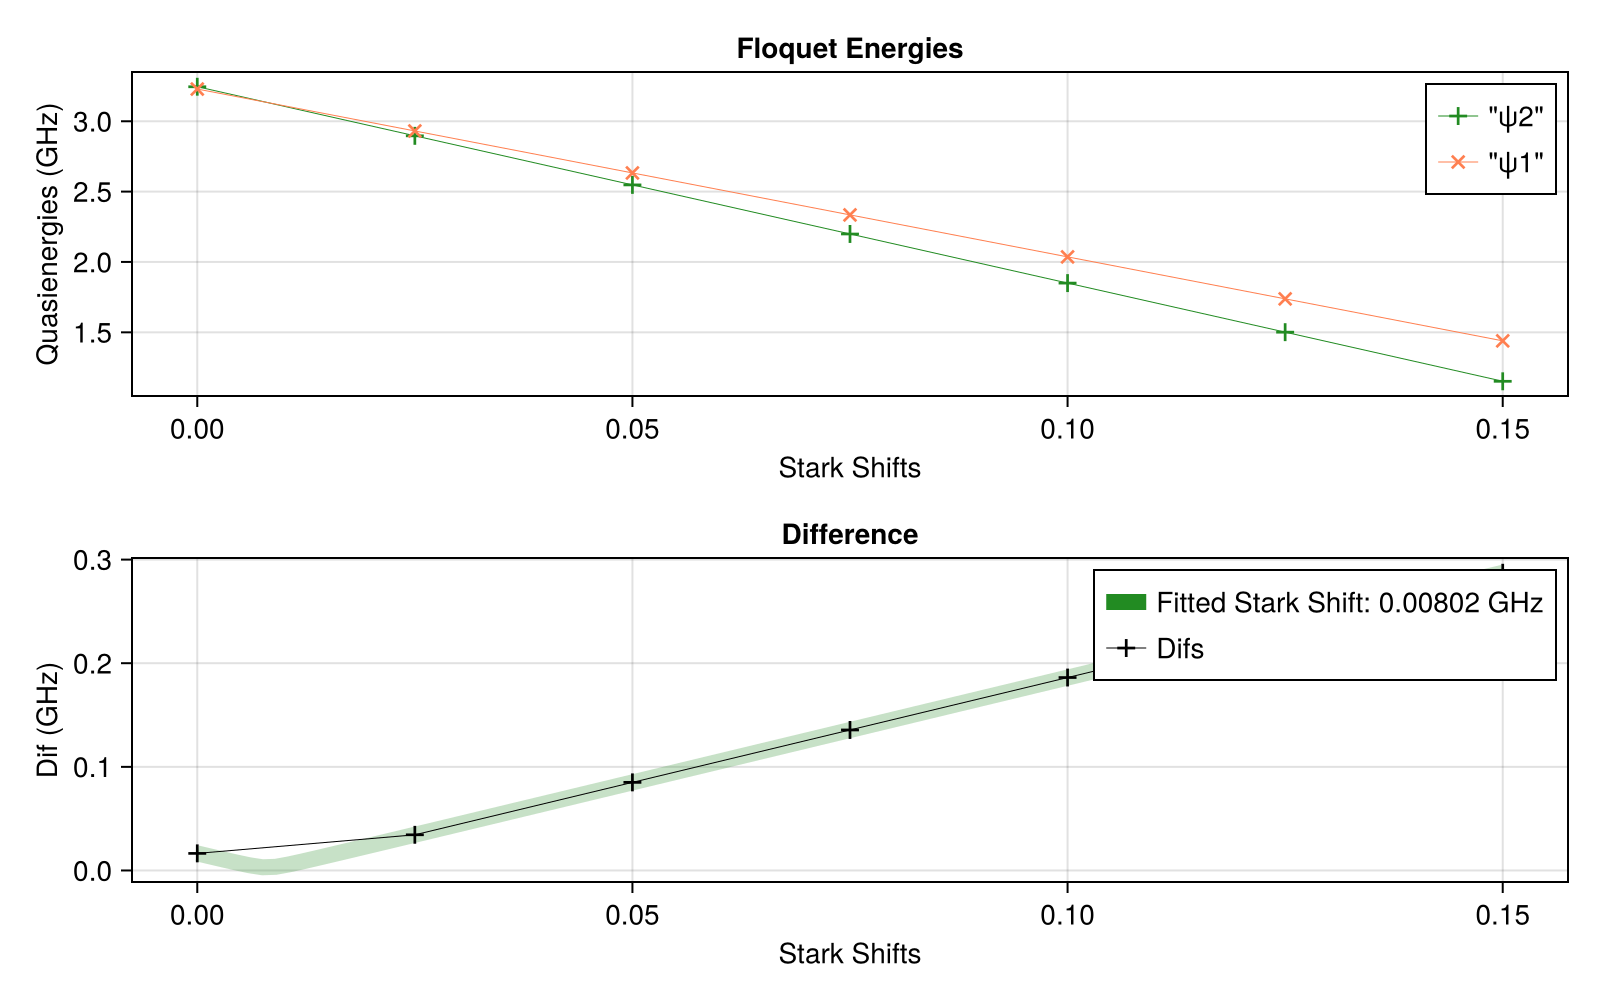

Progress: 100%|█████████████████████████████████████████| Time: 0:01:33


[2024-11-17 15:06:08] Info: Fit Stuff: 3-element Vector{Float64}:	 0.014167194668790808	 0.0018581851015741896	 2.042500585374041
[2024-11-17 15:06:08] Info: Doing Step 6/10


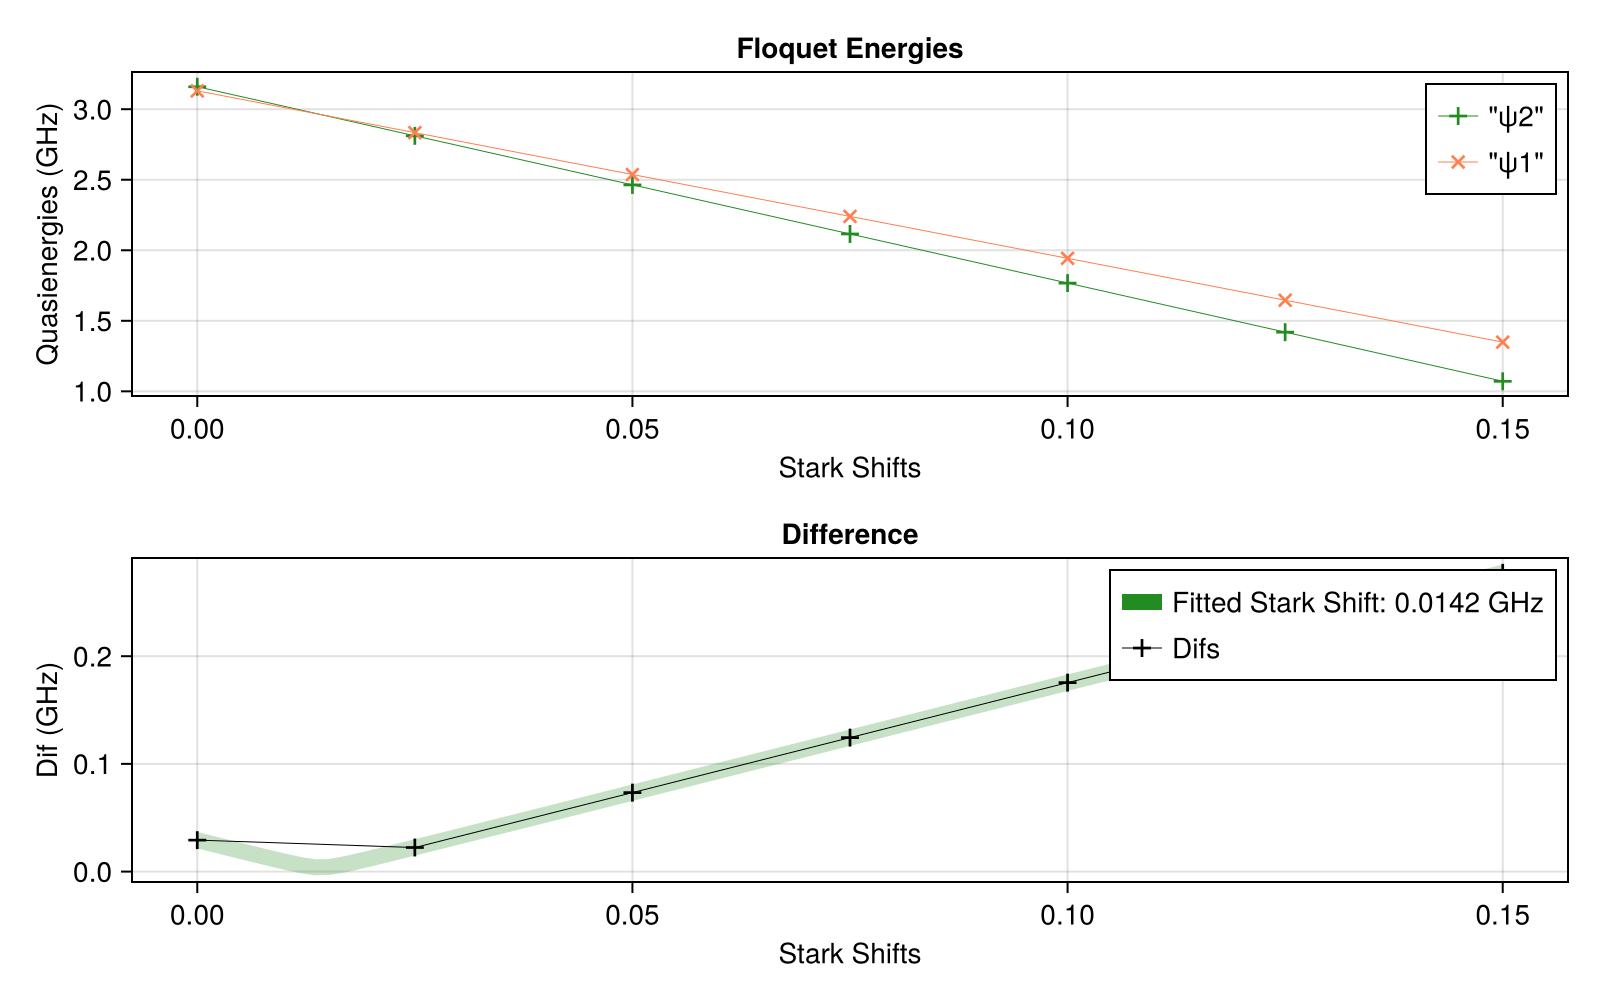

Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


[2024-11-17 15:07:30] Info: Fit Stuff: 3-element Vector{Float64}:	 0.021948724779164125	 0.0019895242871706908	 2.067182614313902
[2024-11-17 15:07:30] Info: Doing Step 7/10


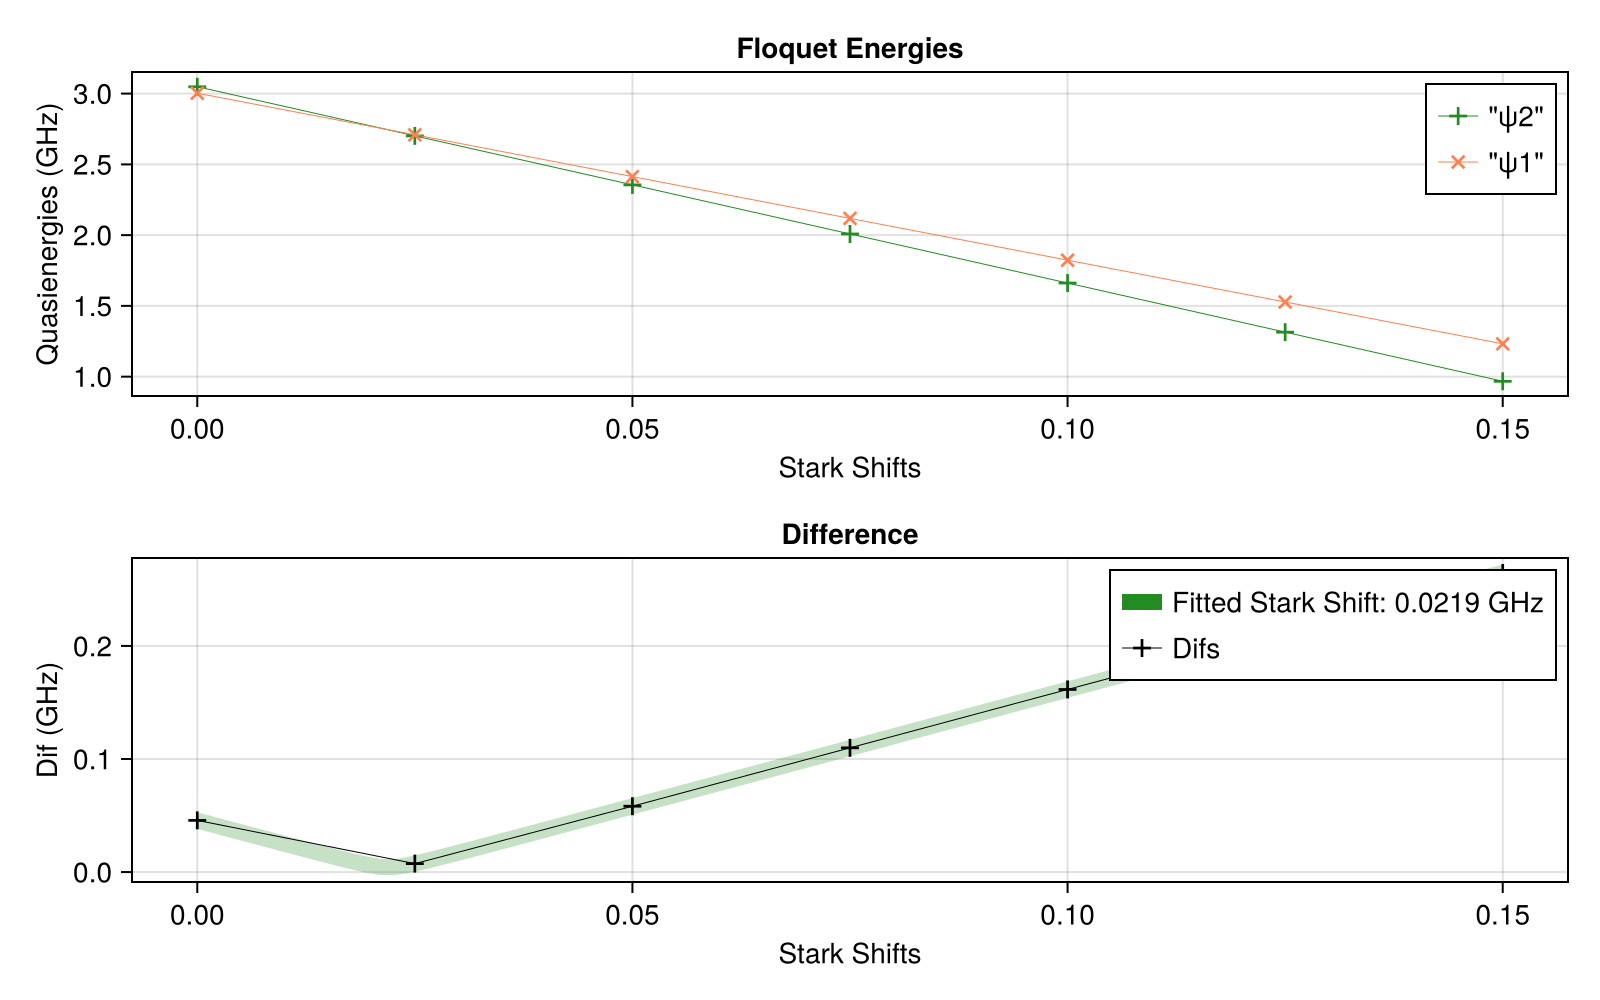

Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


[2024-11-17 15:08:59] Info: Fit Stuff: 3-element Vector{Float64}:	 0.03125618547624005	 0.0024896869599918213	 2.0968292488603737
[2024-11-17 15:08:59] Info: Doing Step 8/10


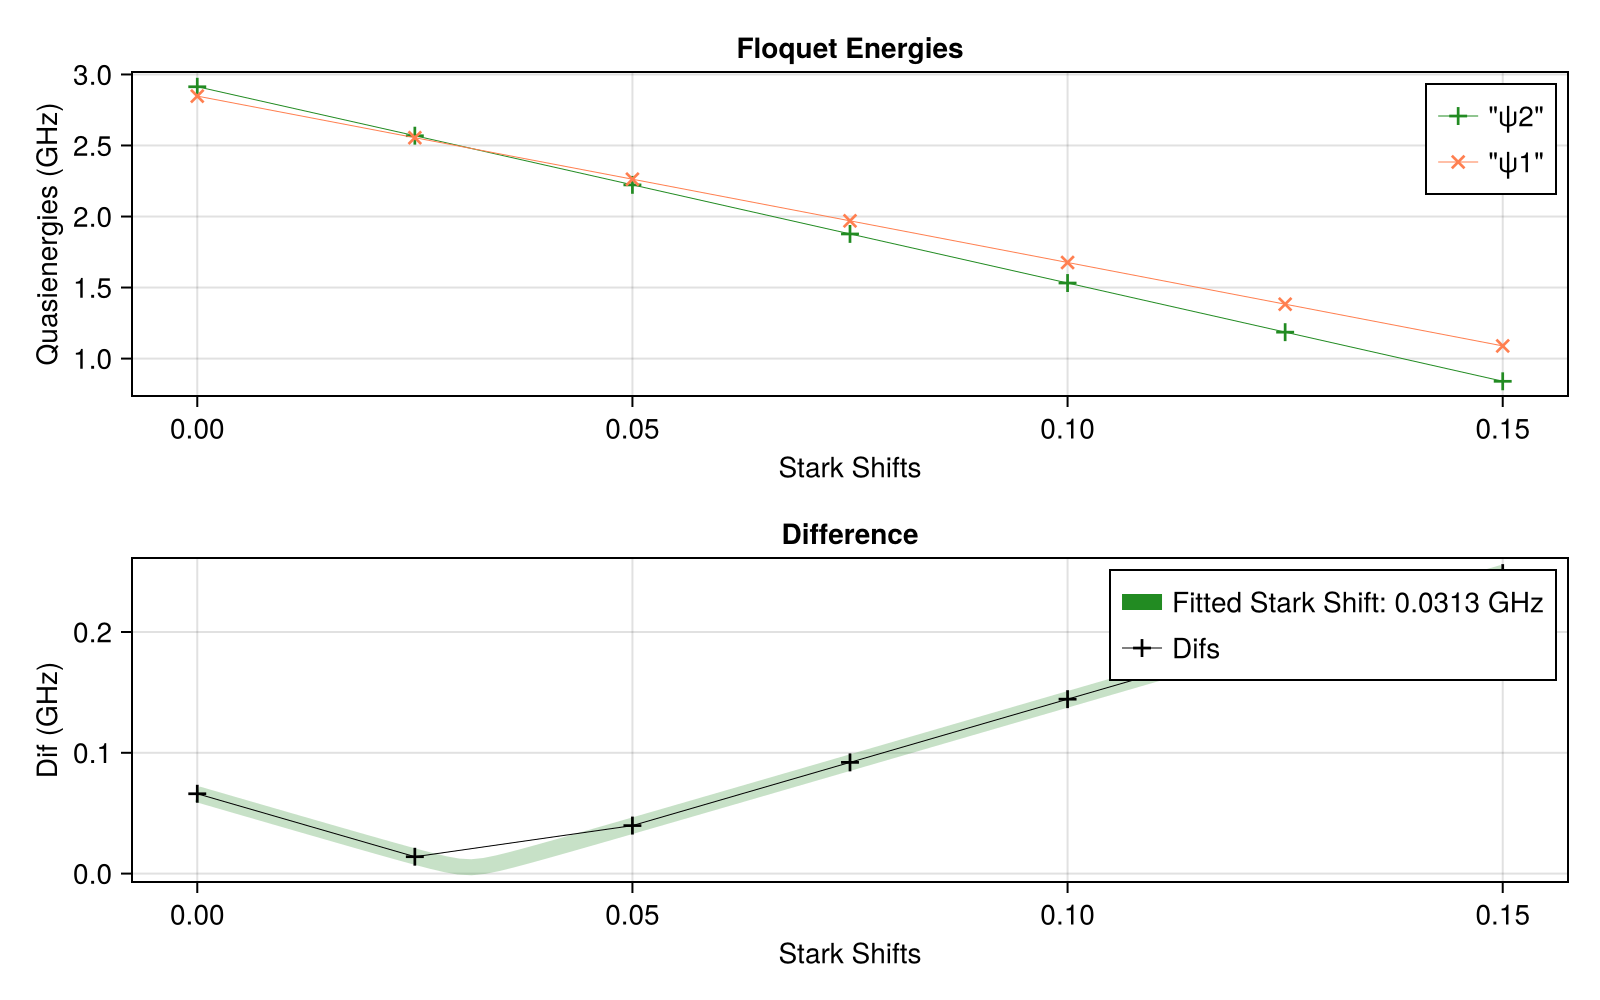

Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


[2024-11-17 15:10:30] Info: Fit Stuff: 3-element Vector{Float64}:	 0.042087945586928265	 0.003059521329909978	 2.1337380199792304
[2024-11-17 15:10:31] Info: Doing Step 9/10


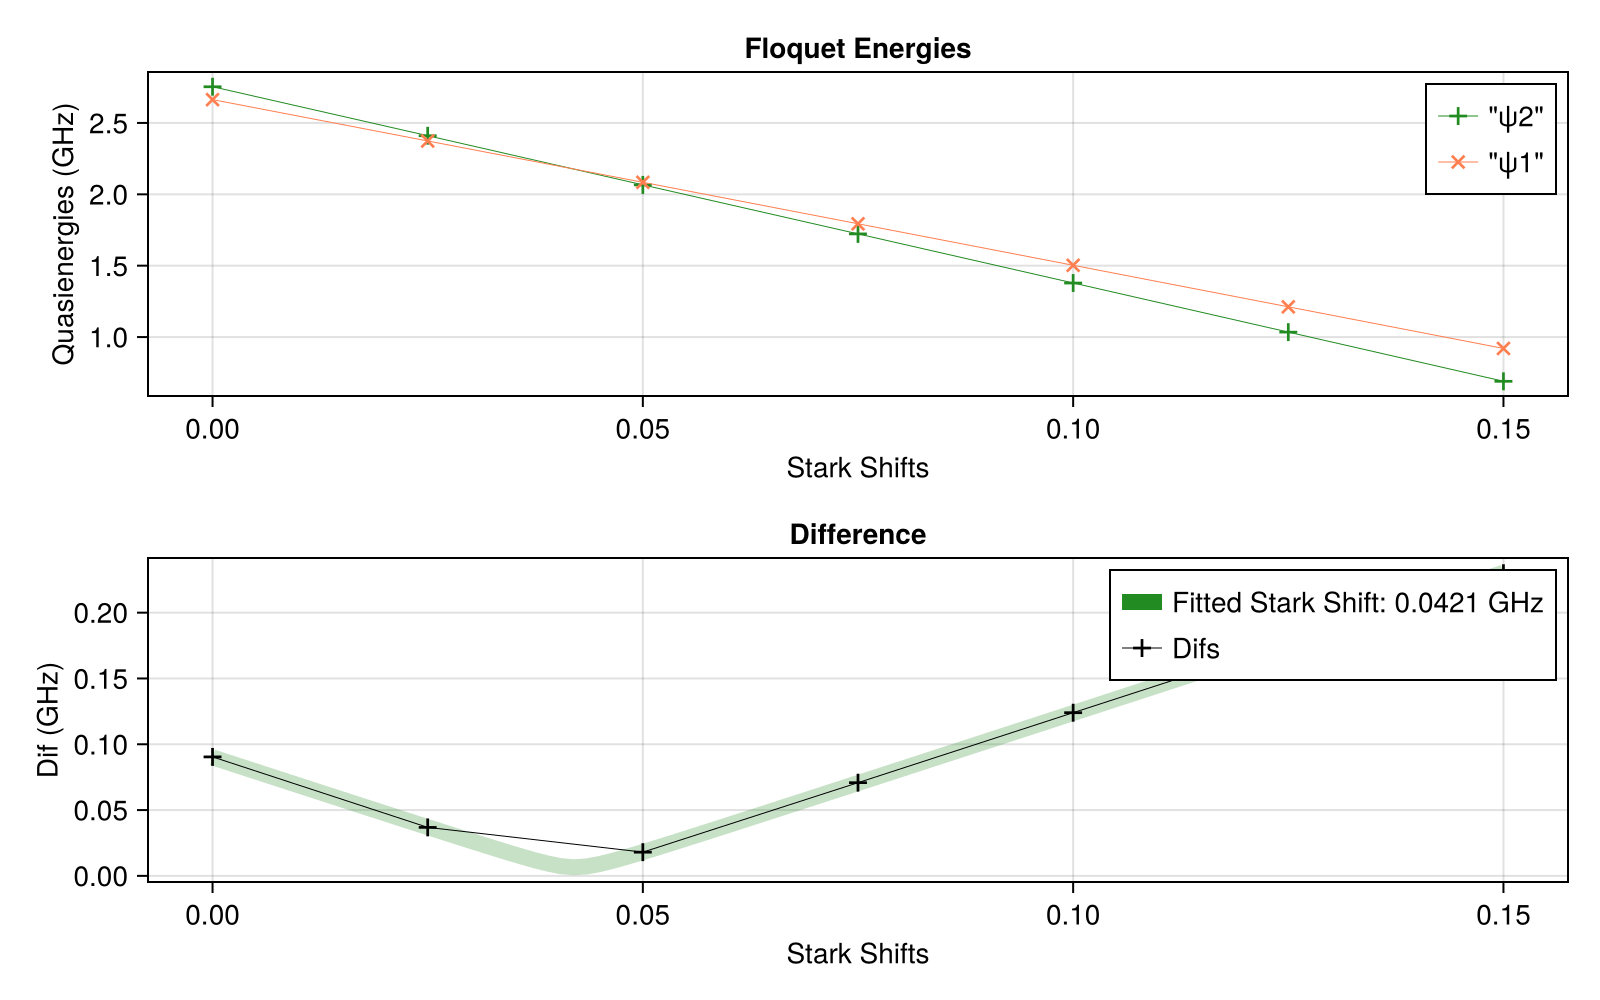

Progress: 100%|█████████████████████████████████████████| Time: 0:01:53


[2024-11-17 15:12:24] Info: Fit Stuff: 3-element Vector{Float64}:	 0.054246831508685034	 0.0027103488062305567	 2.178566424504904
[2024-11-17 15:12:25] Info: Doing Step 10/10


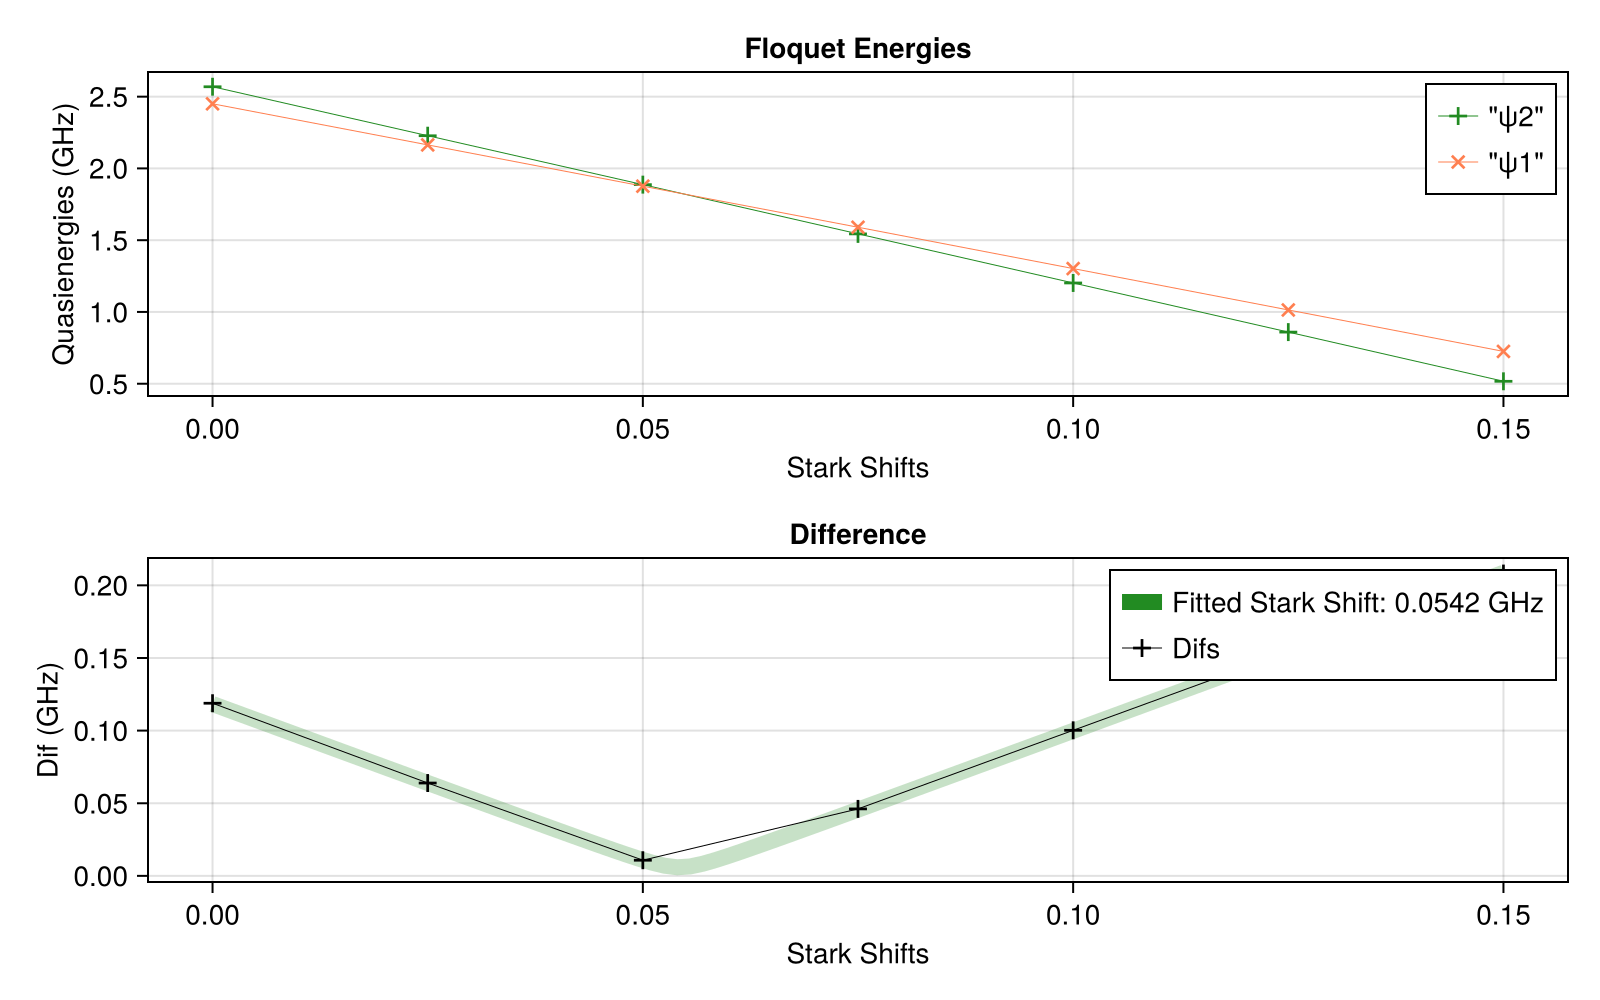

Progress: 100%|█████████████████████████████████████████| Time: 0:02:16


[2024-11-17 15:14:41] Info: Fit Stuff: 3-element Vector{Float64}:	 0.06762260954527952	 0.0035639156743418597	 2.2278405228684464


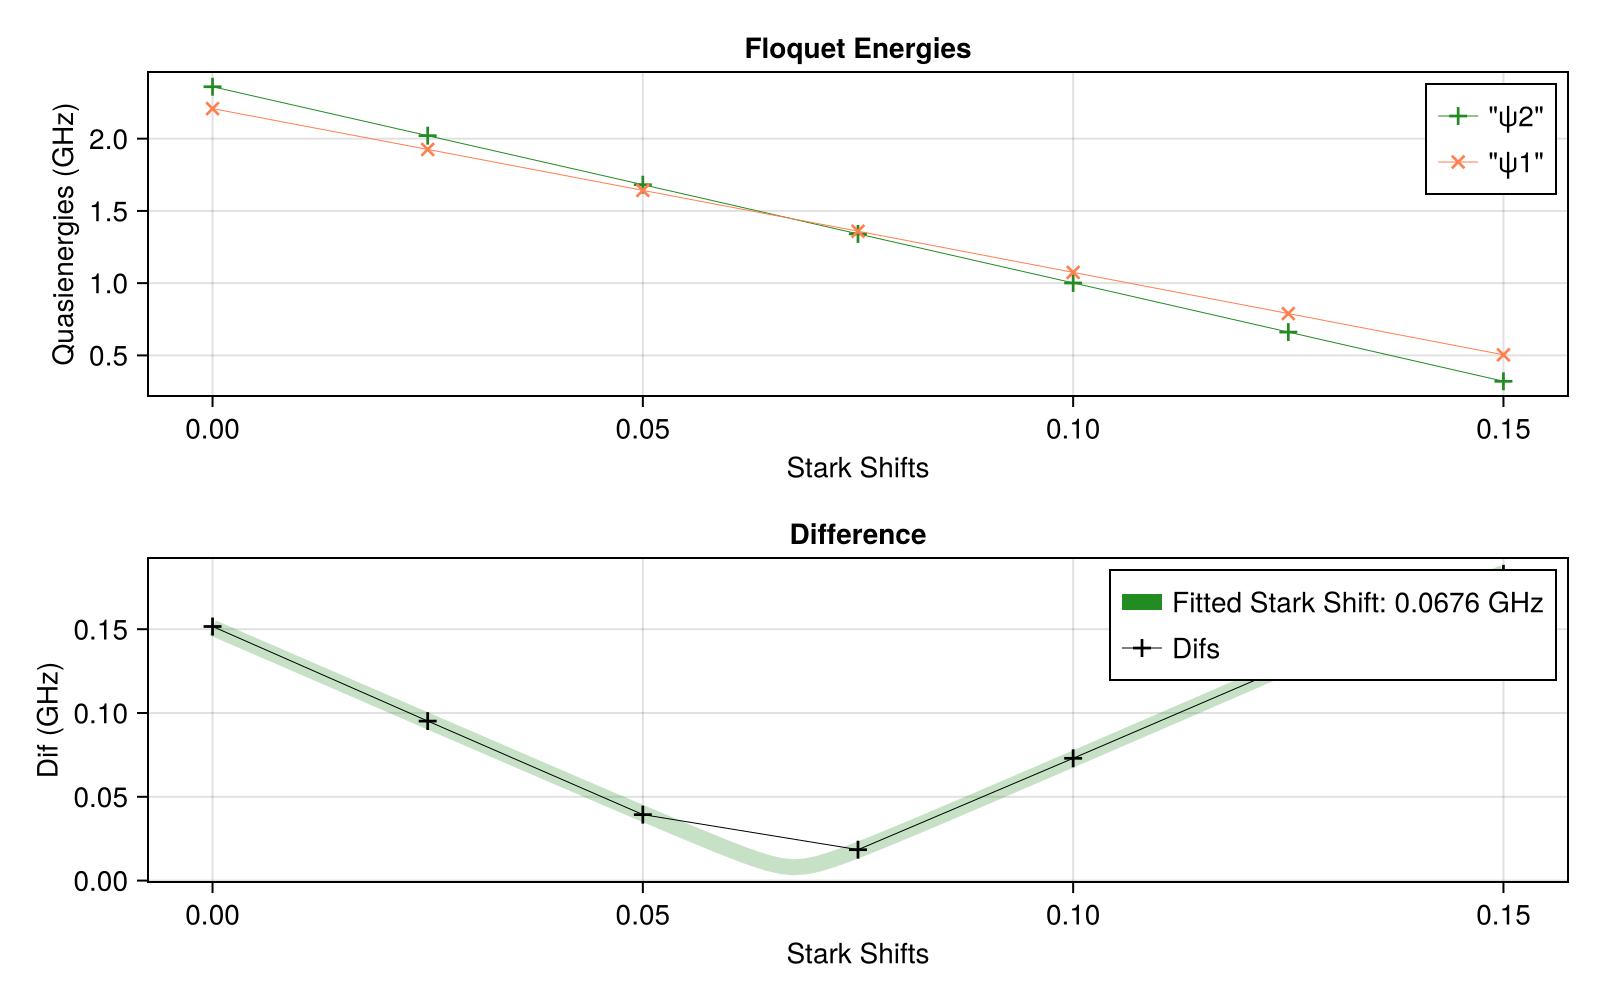

In [22]:
ψf0 = Model.dressed_states[(2,0)]
ψg1 = Model.dressed_states[(0,1)]
ν = Model.dressed_energies[(0,1)] - Model.dressed_energies[(2,0)]

εs = collect(LinRange(0.001, 1, 10))
stark_shift_list = collect(LinRange(0.0, 0.15, 7))
hilbertspace = Model.hilbertspace
Ô_D= Model.n̂ₜ;
stark_shift_fits = SC.Dynamics.FitStarkShifts(hilbertspace, Ô_D, ψf0, ψg1, ν, εs, stark_shift_list);

In [23]:
Model.Stuff["f0g1_stark_shift_fits"] = stark_shift_fits
SC.Utils.save_model(Model)

In [21]:
εs

10-element Vector{Float64}:
 0.001
 0.12311111111111112
 0.24522222222222223
 0.36733333333333335
 0.48944444444444446
 0.6115555555555556
 0.7336666666666667
 0.8557777777777779
 0.9778888888888889
 1.1